# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
import matplotlib.pylab as plt
from sklearn.externals import joblib

In [2]:
train = pd.read_csv('AdvWorksCusts.csv')
test = pd.read_csv('AW_test.csv')
target_reg= pd.read_csv('AW_AveMonthSpend.csv')
target_cl = pd.read_csv('AW_BikeBuyer.csv')

In [3]:
pd.DataFrame.drop_duplicates(train, subset=['CustomerID'], keep='first', inplace=True)
pd.DataFrame.drop_duplicates(target_reg, subset=['CustomerID'], keep='first', inplace=True)
pd.DataFrame.drop_duplicates(target_cl, subset=['CustomerID'], keep='first', inplace=True)

In [4]:
join=train.merge(target_reg,on='CustomerID').merge(target_cl,on='CustomerID')

In [5]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16403
Data columns (total 25 columns):
CustomerID              16404 non-null int64
Title                   88 non-null object
FirstName               16404 non-null object
MiddleName              9453 non-null object
LastName                16404 non-null object
Suffix                  2 non-null object
AddressLine1            16404 non-null object
AddressLine2            274 non-null object
City                    16404 non-null object
StateProvinceName       16404 non-null object
CountryRegionName       16404 non-null object
PostalCode              16404 non-null object
PhoneNumber             16404 non-null object
BirthDate               16404 non-null object
Education               16404 non-null object
Occupation              16404 non-null object
Gender                  16404 non-null object
MaritalStatus           16404 non-null object
HomeOwnerFlag           16404 non-null int64
NumberCarsOwned         16404

In [6]:
nn_cols=[col for col in join.columns if join[col].count()>=0.7*len(join)]
print(nn_cols)

['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer']


In [7]:
join=join[nn_cols]

In [8]:
join.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
BikeBuyer               0
dtype: int64

In [9]:
join.dtypes

CustomerID               int64
FirstName               object
LastName                object
AddressLine1            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

In [10]:
join.nunique()

CustomerID              16404
FirstName                 662
LastName                  363
AddressLine1            11871
City                      269
StateProvinceName          52
CountryRegionName           6
PostalCode                323
PhoneNumber              7949
BirthDate                7896
Education                   5
Occupation                  5
Gender                      2
MaritalStatus               2
HomeOwnerFlag               2
NumberCarsOwned             5
NumberChildrenAtHome        6
TotalChildren               6
YearlyIncome            15465
AveMonthSpend             152
BikeBuyer                   2
dtype: int64

In [11]:
to_drop = ['FirstName','LastName','City','StateProvinceName','AddressLine1','PostalCode','PhoneNumber']

join.drop(to_drop,inplace=True,axis=1)

In [12]:
join.head()

,CustomerID,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Australia,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Australia,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Australia,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Australia,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Australia,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1


In [13]:
join['BirthYear']=pd.to_datetime(join['BirthDate']).dt.year;
join['Age']=1998-join['BirthYear']
join.drop(['BirthDate','BirthYear'],axis=1,inplace=True)

In [14]:
test['BirthYear']=pd.to_datetime(test['BirthDate']).dt.year;
test['Age']=1998-test['BirthYear']
test.drop(['BirthDate','BirthYear'],axis=1,inplace=True)

In [15]:
join.isnull().sum()

CustomerID              0
CountryRegionName       0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
BikeBuyer               0
Age                     0
dtype: int64

In [16]:
join.nunique()

CustomerID              16404
CountryRegionName           6
Education                   5
Occupation                  5
Gender                      2
MaritalStatus               2
HomeOwnerFlag               2
NumberCarsOwned             5
NumberChildrenAtHome        6
TotalChildren               6
YearlyIncome            15465
AveMonthSpend             152
BikeBuyer                   2
Age                        70
dtype: int64

In [17]:
cat_col=[col for col in join.columns if join[col].nunique()<7]
num_col=list(set([col for col in join.columns if join[col].nunique()>7])-set(['CustomerID']))

In [18]:
print('Categorical features are:',cat_col)
print('')
print('Numerical features are:',num_col)

Categorical features are: ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'BikeBuyer']

Numerical features are: ['YearlyIncome', 'AveMonthSpend', 'Age']


# Classification Task

## Initial EDA

In [19]:
join.BikeBuyer.value_counts()

0    10953
1     5451
Name: BikeBuyer, dtype: int64

In [20]:
join

,CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,11000,Australia,Bachelors,Professional,M,M,1,0,0,2,137947,89,0,32
1,11001,Australia,Bachelors,Professional,M,S,0,1,3,3,101141,117,1,33
2,11002,Australia,Bachelors,Professional,M,M,1,1,3,3,91945,123,0,33
3,11003,Australia,Bachelors,Professional,F,S,0,1,0,0,86688,50,0,30
4,11004,Australia,Bachelors,Professional,F,S,1,4,5,5,92771,95,1,30
5,11005,Australia,Bachelors,Professional,M,S,1,1,0,0,103199,78,1,33
6,11006,Australia,Bachelors,Professional,F,S,1,1,0,0,84756,54,1,33
7,11007,Australia,Bachelors,Professional,M,M,1,2,3,3,109759,130,1,34
8,11008,Australia,Bachelors,Professional,F,S,1,3,4,4,88005,85,1,34
9,11009,Australia,Bachelors,Professional,M,S,0,1,0,0,106399,74,0,34


## by categorical

In [21]:
for col in cat_col:
    print(join[col].value_counts())
    print('\n')

United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64


Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64


Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64


M    8290
F    8114
Name: Gender, dtype: int64


M    8852
S    7552
Name: MaritalStatus, dtype: int64


1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64


2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64


0    9924
1    2180
2    1455
3    1057
4     943
5     845
Name: NumberChildrenAtHome, dtype: int64


0    4244
2    3166
1    3054
4    2250
3    1977
5    1713
Name: TotalChildren, dtype: int64


0    10953
1     5451
Name: BikeBuyer, dtype: int64


CountryRegionName


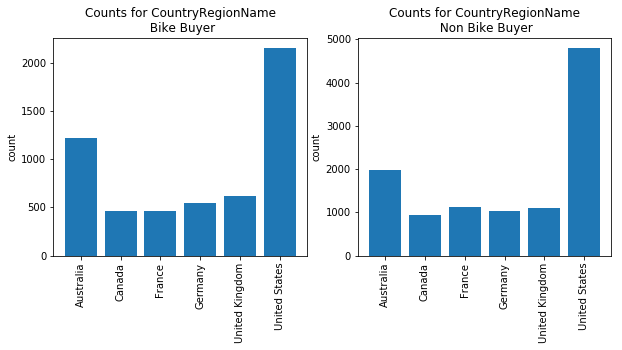

Education


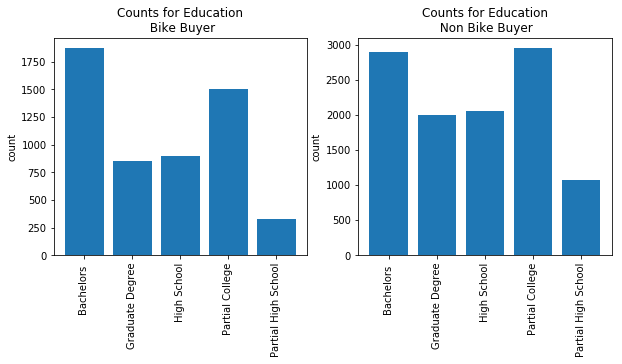

Occupation


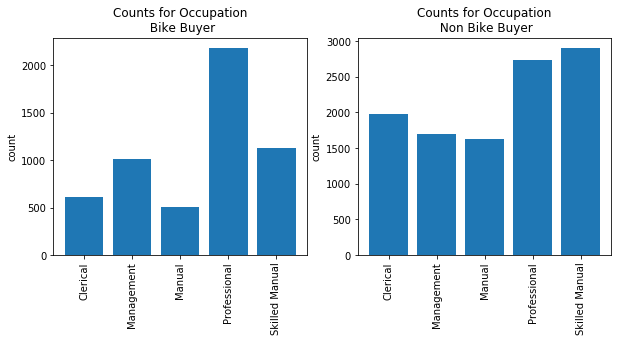

Gender


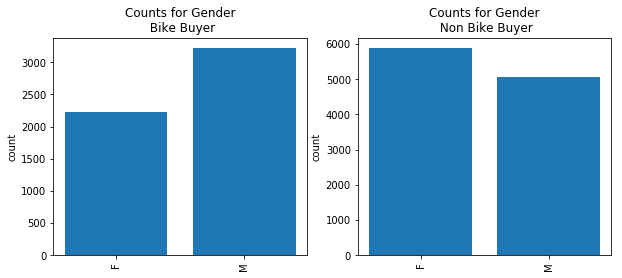

MaritalStatus


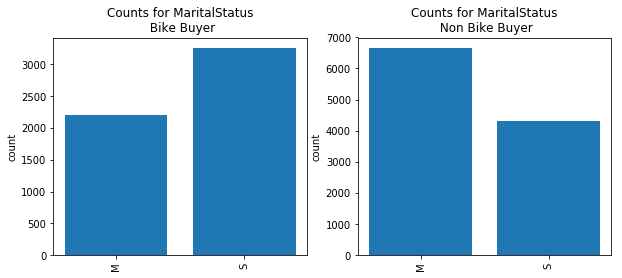

HomeOwnerFlag


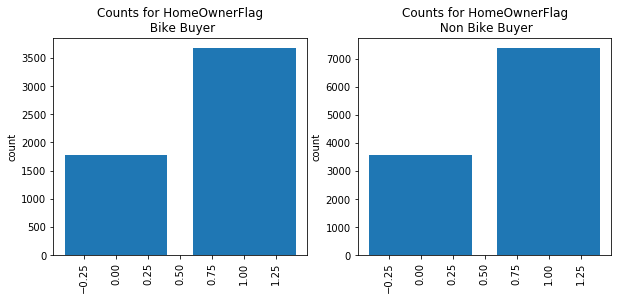

NumberCarsOwned


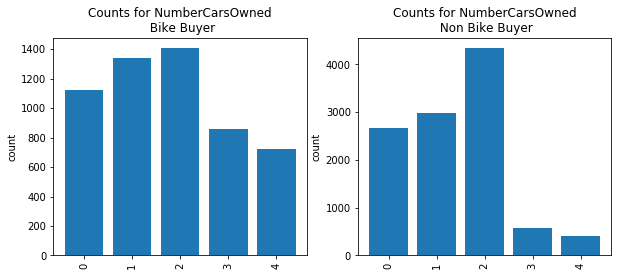

NumberChildrenAtHome


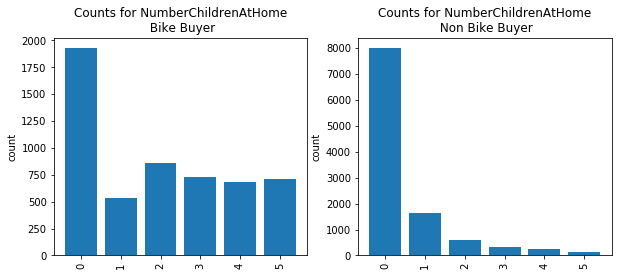

TotalChildren


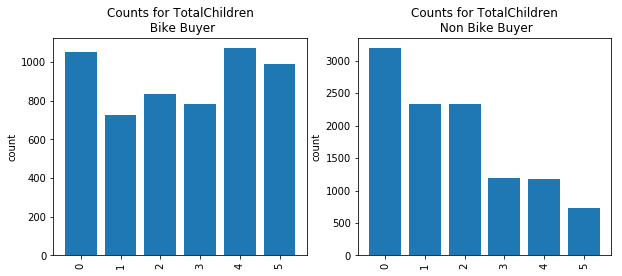

In [22]:
join['dummy'] = np.ones(shape = join.shape[0])

for col in cat_col:
    if col == 'BikeBuyer':
        continue
    else:
        print(col)
        counts = join[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
        temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
        _ = plt.figure(figsize = (10,4))
        plt.subplot(1, 2, 1)
        temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n Bike Buyer')
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n Non Bike Buyer')
        plt.ylabel('count')
        plt.show()
        
del join['dummy']

In [467]:
train[join['BikeBuyer']==1].describe()

C:\Users\ADEBAYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

## Important notes

- Important features could be: education , occupation, gender, marital status, number of children at home, number of cars owned,number of children at home, total children.

- Possibly bin numbers of cars owned to less than three and greater or equals to three

- Possibly bin number of children at home to less than one or two and the inverse

- Possibly bin total children using less than 3 and inverse 


## By Numerical

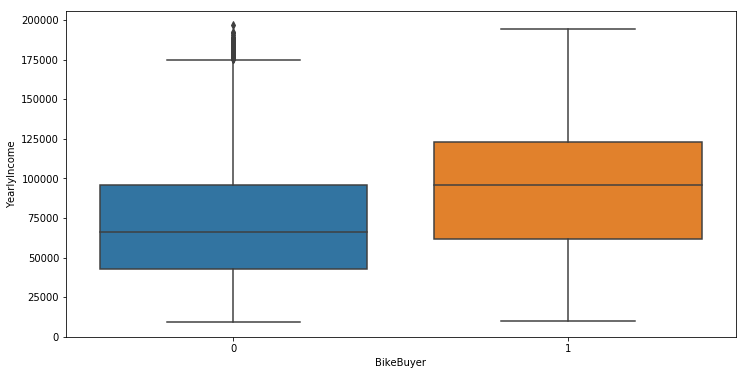

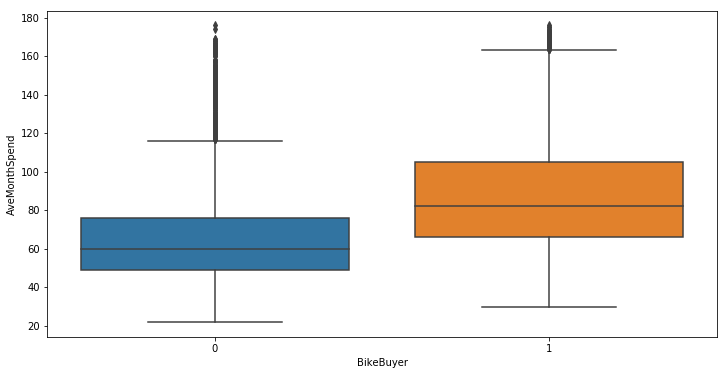

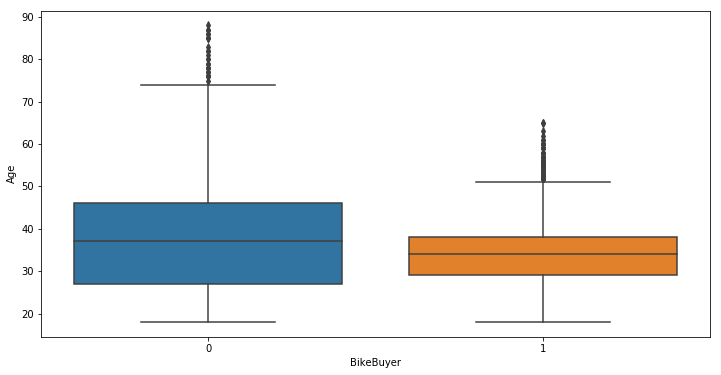

In [23]:
def plot_box(data, cols,target):
    for col in cols:
        plt.figure(figsize=(12,6))
        sns.boxplot(y=col, x=target, data=data)
        plt.ylabel(col) # Set text for the x axis
        plt.xlabel(target)# Set text for y axis
        plt.show()
        
plot_box(data=join,cols=num_col,target='BikeBuyer')

For CountryRegionName


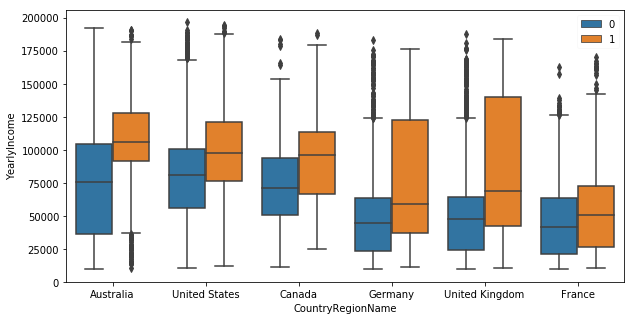

For Education


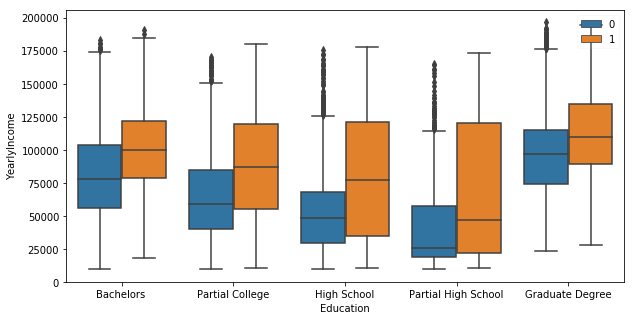

For Occupation


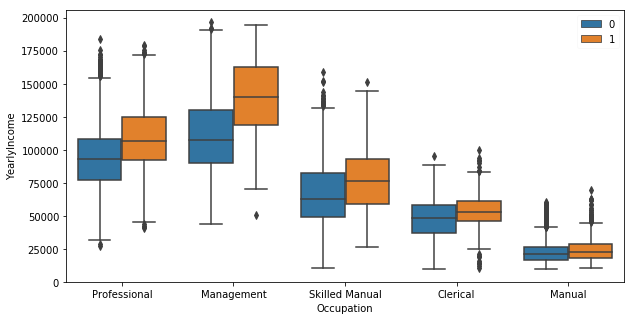

For Gender


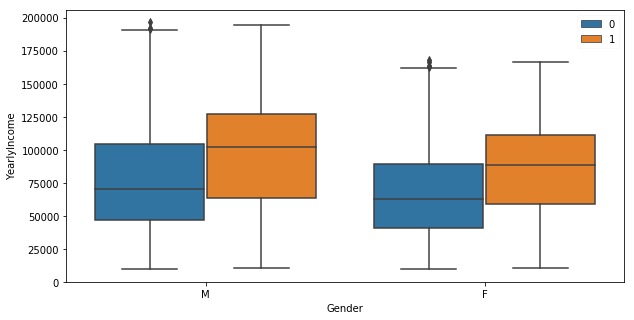

For MaritalStatus


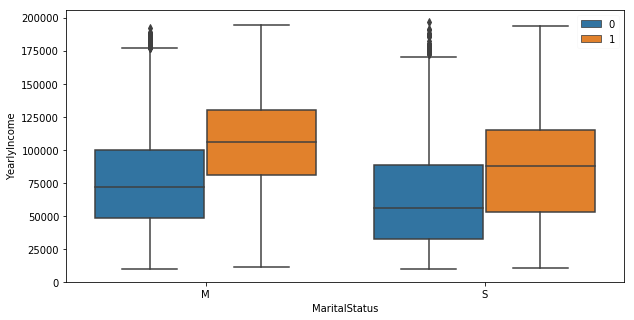

For HomeOwnerFlag


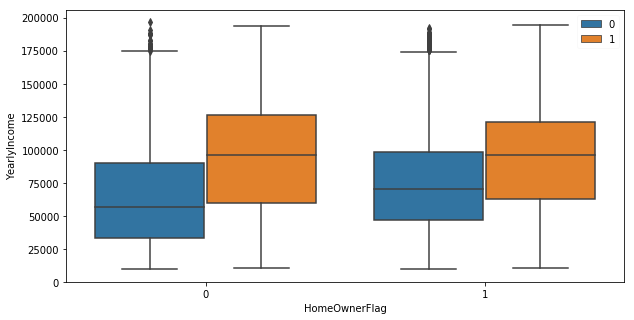

For NumberCarsOwned


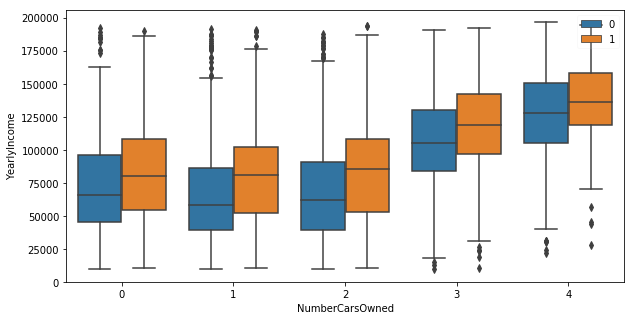

For NumberChildrenAtHome


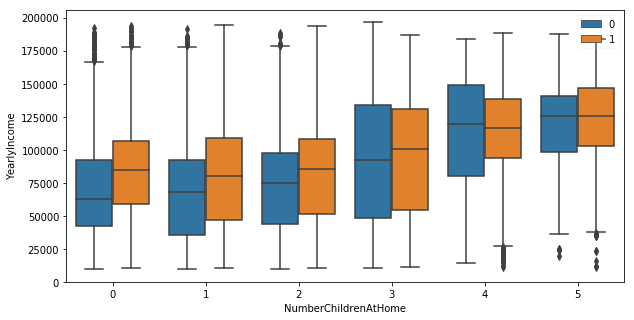

For TotalChildren


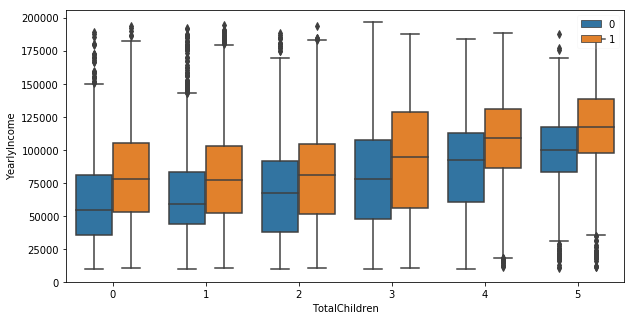

For BikeBuyer


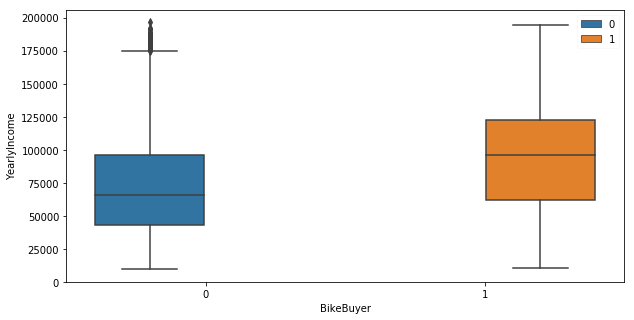

For CountryRegionName


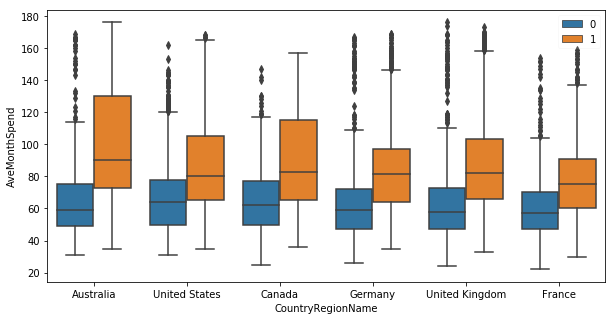

For Education


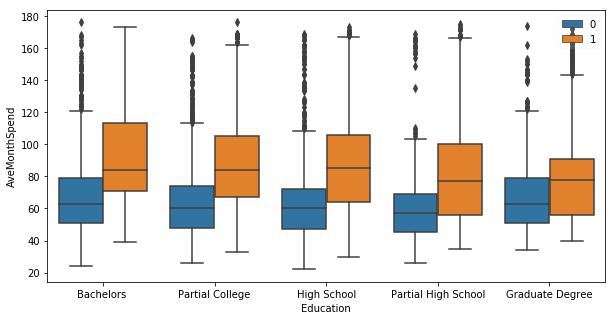

For Occupation


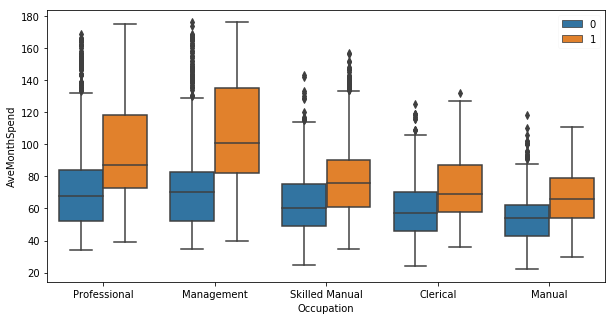

For Gender


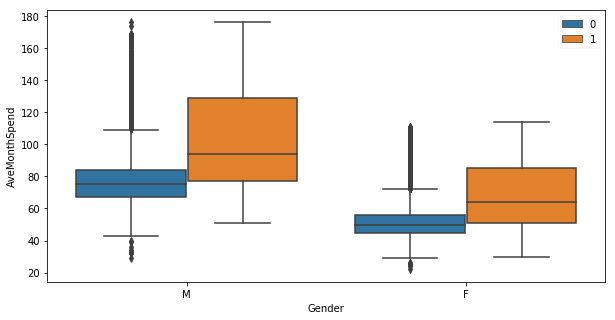

For MaritalStatus


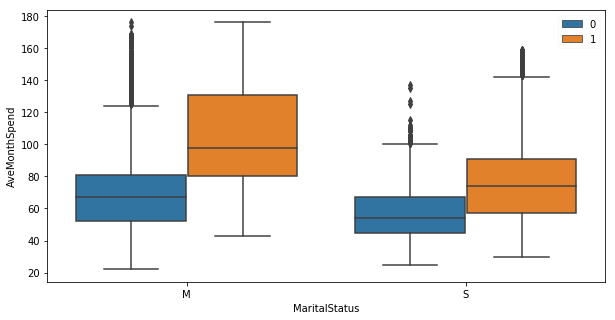

For HomeOwnerFlag


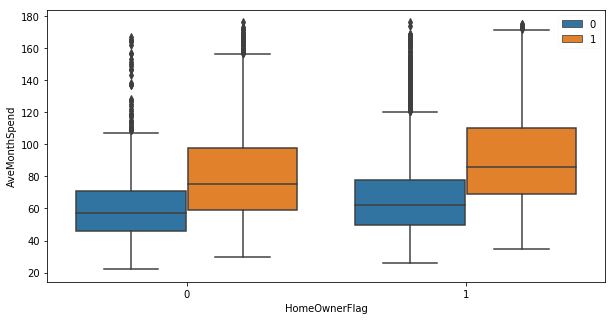

For NumberCarsOwned


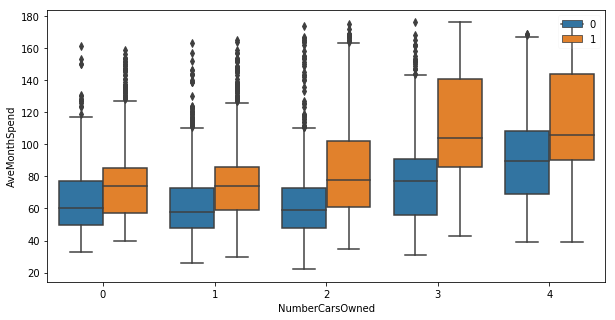

For NumberChildrenAtHome


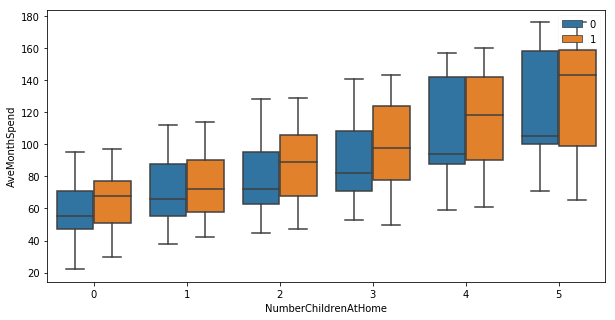

For TotalChildren


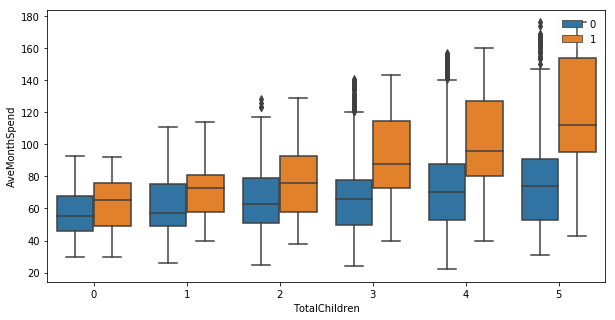

For BikeBuyer


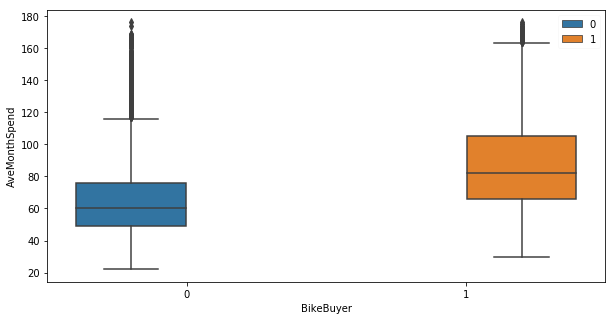

For CountryRegionName


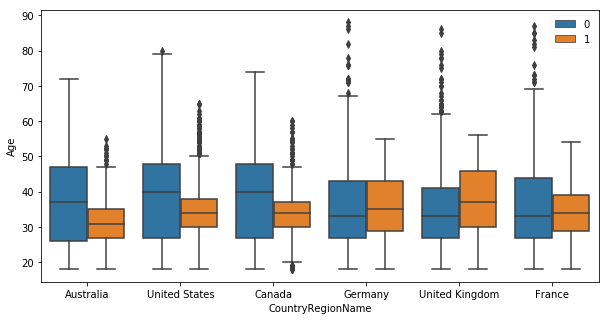

For Education


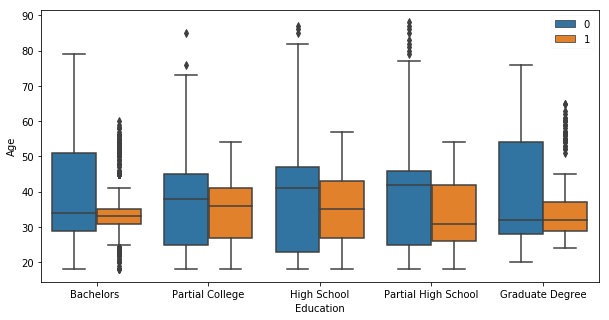

For Occupation


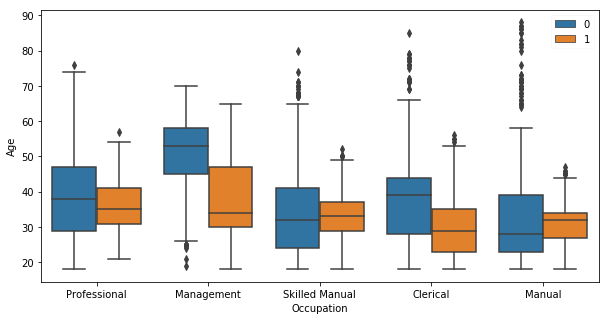

For Gender


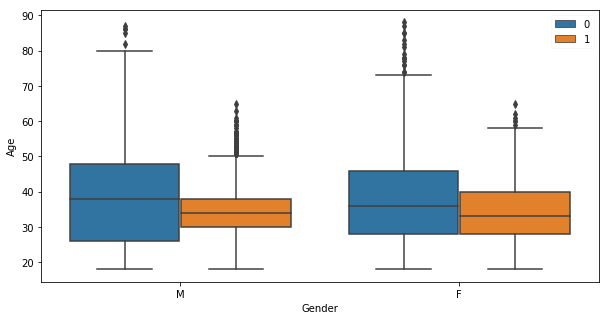

For MaritalStatus


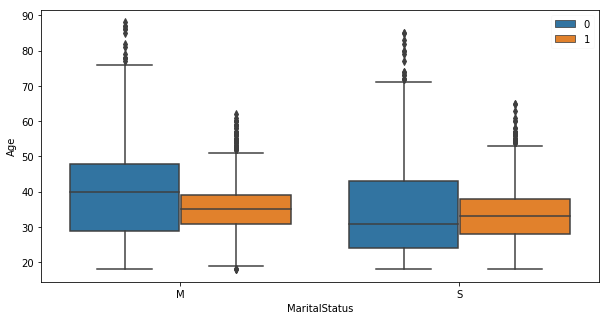

For HomeOwnerFlag


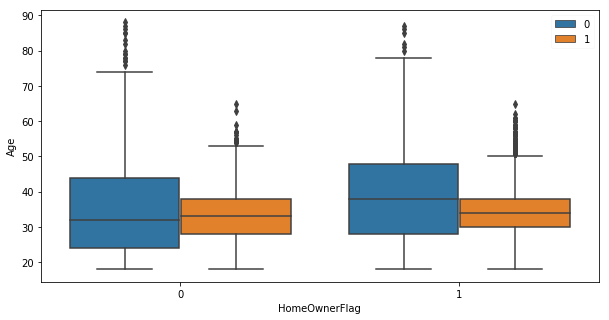

For NumberCarsOwned


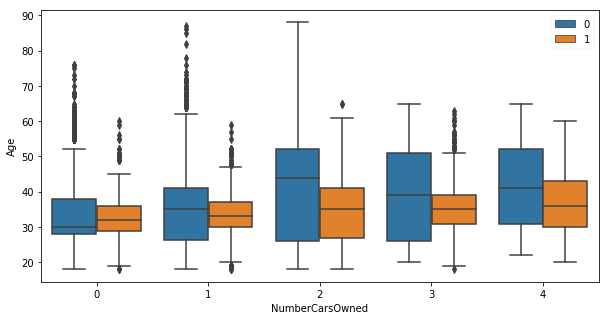

For NumberChildrenAtHome


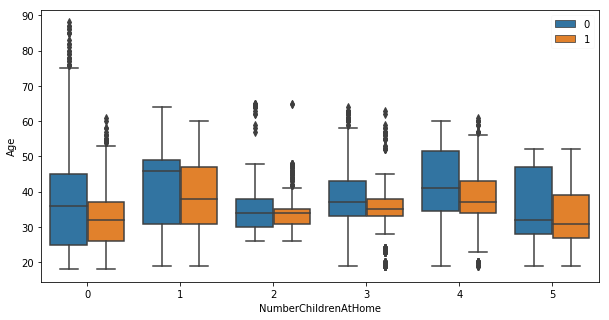

For TotalChildren


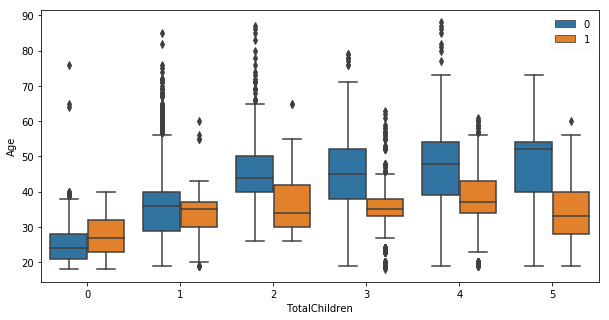

For BikeBuyer


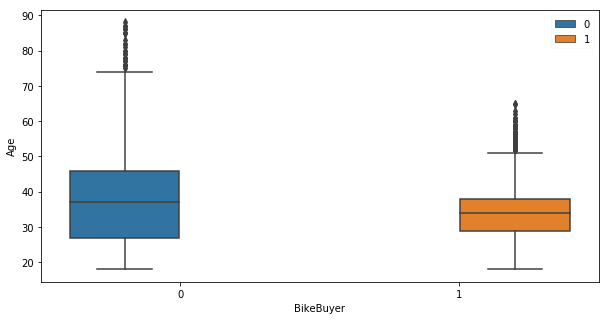

In [24]:
def plot_box(data, cols,target,hue):
    for col in cols:
        for cat in hue:
            plt.figure(figsize=(10,5))
            print('For ' + cat)
            sns.boxplot(y=col, hue=target, data=data,x=cat)
            plt.legend(loc=1,framealpha=0.1)
            plt.ylabel(col) # Set text for the x axis
            plt.xlabel(cat)# Set text for y axis
            plt.show()
        
plot_box(data=join,cols=num_col,target='BikeBuyer',hue=cat_col)

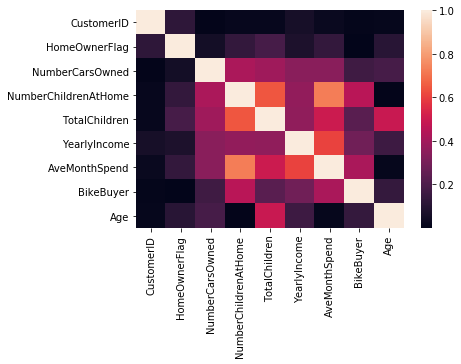

In [25]:
sns.heatmap(abs(join.corr()))

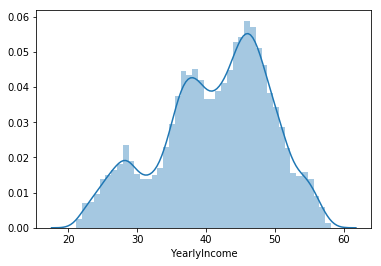

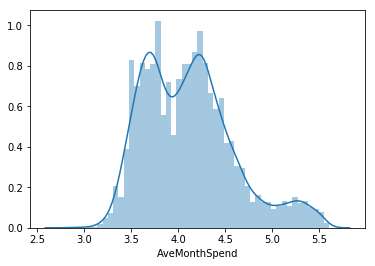

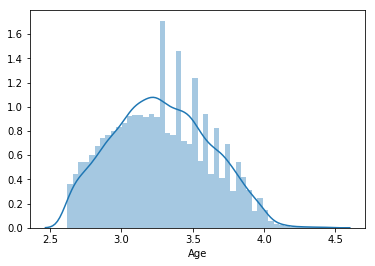

In [26]:
for col in num_col:
    sns.distplot(np.cbrt(join[col]))
    plt.show()

## Feature Engineering

In [27]:
join.columns

Index(['CustomerID', 'CountryRegionName', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome',
       'AveMonthSpend', 'BikeBuyer', 'Age'],
      dtype='object')

In [28]:
join.drop(['CustomerID'],inplace=True,axis=1)

In [29]:
join.isnull().sum()

CountryRegionName       0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
BikeBuyer               0
Age                     0
dtype: int64

In [30]:
print(join.shape)

# Create correlation matrix
corr_matrix = pd.DataFrame(join,columns=join.columns).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

feature_mat=pd.DataFrame(join,columns=join.columns).drop(to_drop,axis=1)

print(to_drop)
print(feature_mat.shape)

(16404, 13)
[]
(16404, 13)


In [441]:
bins = [20,40,60,80,100]
join['age_binned'] = pd.cut(join['Age'],bins)
test['age_binned'] = pd.cut(test['Age'],bins)

In [32]:
bins = [2,5]
join['cars_owned_binned'] = np.searchsorted(bins, join['NumberCarsOwned'].values)
test['cars_owned_binned'] = np.searchsorted(bins, test['NumberCarsOwned'].values)

In [33]:
bins = [1,8]
join['childrenhome_binned'] = np.searchsorted(bins, join['NumberChildrenAtHome'].values)
test['childrenhome_binned'] = np.searchsorted(bins, test['NumberChildrenAtHome'].values)

In [34]:
bins = [2,8]
join['totalchildren_binned'] = np.searchsorted(bins, join['TotalChildren'].values)
test['totalchildren_binned'] = np.searchsorted(bins, test['TotalChildren'].values)

In [35]:
test.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'Age', 'age_binned', 'cars_owned_binned',
       'childrenhome_binned', 'totalchildren_binned'],
      dtype='object')

In [36]:
join.columns

Index(['CountryRegionName', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome',
       'AveMonthSpend', 'BikeBuyer', 'Age', 'age_binned', 'cars_owned_binned',
       'childrenhome_binned', 'totalchildren_binned'],
      dtype='object')

In [37]:
join.nunique()

CountryRegionName           6
Education                   5
Occupation                  5
Gender                      2
MaritalStatus               2
HomeOwnerFlag               2
NumberCarsOwned             5
NumberChildrenAtHome        6
TotalChildren               6
YearlyIncome            15465
AveMonthSpend             152
BikeBuyer                   2
Age                        70
age_binned                  8
cars_owned_binned           2
childrenhome_binned         2
totalchildren_binned        2
dtype: int64

In [38]:
cat_col = [col for col in join if join[col].nunique()<10]
num_col = [col for col in join if join[col].nunique()>10]

In [39]:
join[cat_col].dtypes

CountryRegionName       object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
BikeBuyer                int64
age_binned               int64
cars_owned_binned        int64
childrenhome_binned      int64
totalchildren_binned     int64
dtype: object

In [40]:
for col in cat_col:
    join[col]=join[col].astype(np.str)
    #test[col]=test[col].astype(np.str)

In [41]:
cat_col=list(set(cat_col)-set(['BikeBuyer']))

In [42]:
X=join[:].drop(['BikeBuyer','AveMonthSpend'],axis=1)
X=pd.get_dummies(X,columns=cat_col,prefix=cat_col)

In [43]:
join.columns.shape

(17,)

In [44]:
test.columns.shape

(27,)

In [45]:
col=[col for col in join.drop(['BikeBuyer','AveMonthSpend'],axis=1).columns]

In [46]:
te=test[col]
te=pd.get_dummies(te,columns=cat_col,prefix=cat_col)

## Modelling

In [460]:
X=X
Y=join['BikeBuyer']

Y=Y.ravel().astype('float64')

split_test_size=0.3

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X,Y, test_size=split_test_size, random_state=5)

In [461]:
print(Y.mean())
print(Ytrain.mean())
print(Ytest.mean())

0.3322970007315289
0.33069151715728967
0.33604225924420966


In [362]:
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate

In [359]:
from sklearn.metrics import confusion_matrix,make_scorer

In [304]:
from sklearn.linear_model import LogisticRegressionCV

In [314]:
lr=LogisticRegressionCV(random_state=6,n_jobs=-1,max_iter=1000,cv=10).fit(Xtrain,Ytrain)

In [315]:
lr.score(Xtest,Ytest)

0.7868752539618041

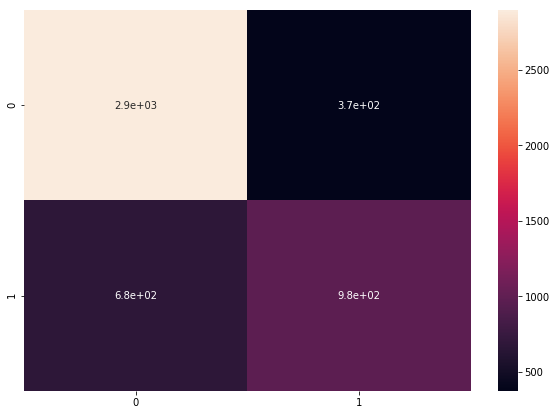

In [325]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(Ytest,lr.predict(Xtest)),
            annot=True)

In [55]:
# save the model to disk
filename = 'lr_model.sav'
joblib.dump(lr,filename)

['lr_model.sav']

In [326]:
from catboost import CatBoostClassifier
cb=CatBoostClassifier(iterations=1000,depth=4,eval_metric='Accuracy',
                    random_seed=10,learning_rate=.05,verbose=False)

In [462]:
cb.fit(Xtrain,Ytrain,use_best_model=True,eval_set=(Xtest,Ytest),early_stopping_rounds=50,verbose=50)

0:	learn: 0.7774778	test: 0.7637139	best: 0.7637139 (0)	total: 109ms	remaining: 1m 48s
50:	learn: 0.8033444	test: 0.7897196	best: 0.7899228 (43)	total: 5.58s	remaining: 1m 43s
100:	learn: 0.8062184	test: 0.7966274	best: 0.7968306 (99)	total: 9.73s	remaining: 1m 26s
150:	learn: 0.8076990	test: 0.7954084	best: 0.7970337 (104)	total: 13.9s	remaining: 1m 17s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7970337261
bestIteration = 104

Shrink model to first 105 iterations.


In [58]:
# save the model to disk
filename = 'cb_model.sav'
joblib.dump(cb, filename)

['cb_model.sav']

In [228]:
from sklearn.feature_selection import SelectFromModel as skb

In [232]:
sel1=skb(cb).fit(Xtrain,Ytrain)

In [233]:
sel2=skb(gb).fit(Xtrain,Ytrain)

In [234]:
sel3=skb(rf).fit(Xtrain,Ytrain)

In [242]:
xc=Xtrain.columns

In [262]:
f1=set((xc[sel1.get_support()]))
f2=set((xc[sel2.get_support()]))
f3=set((xc[sel3.get_support()]))

In [281]:
fs=list(set.union(f1,f2,f3))

In [284]:
cb.fit(Xtrain[fs],Ytrain,use_best_model=True,
       eval_set=(Xtest[fs],Ytest),early_stopping_rounds=50,verbose=50)

0:	learn: 0.7797422	test: 0.7655425	best: 0.7655425 (0)	total: 71.5ms	remaining: 1m 11s
50:	learn: 0.8021251	test: 0.7917513	best: 0.7917513 (50)	total: 3.75s	remaining: 1m 9s
100:	learn: 0.8040411	test: 0.7919545	best: 0.7933767 (67)	total: 7.14s	remaining: 1m 3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7933766761
bestIteration = 67

Shrink model to first 68 iterations.


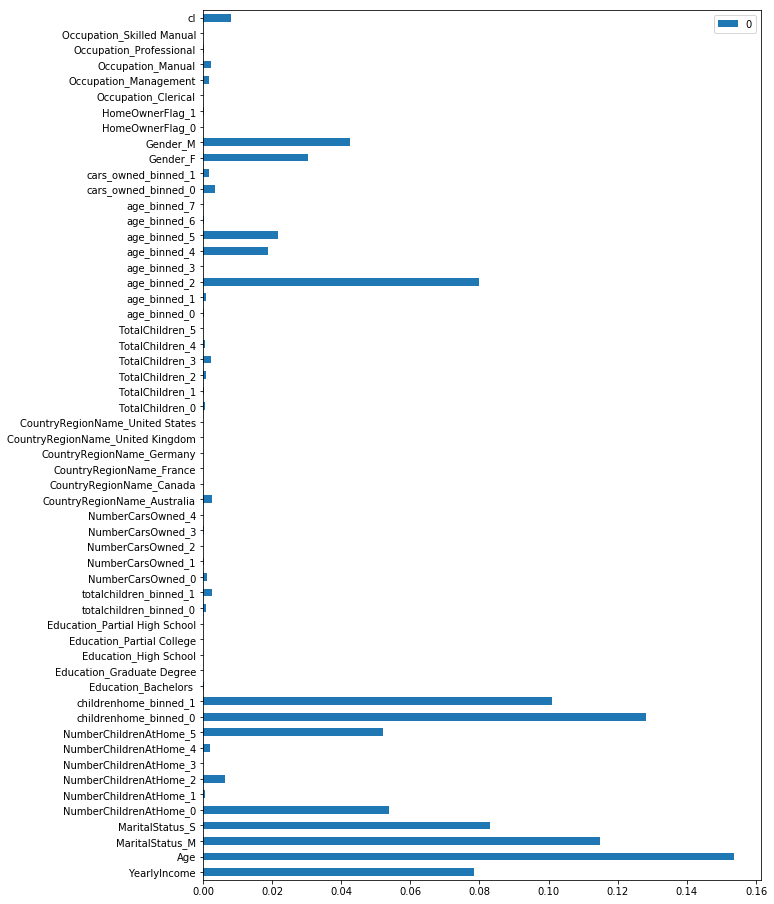

In [463]:
b=list(cb.feature_importances_/cb.feature_importances_.sum())
pd.DataFrame(index=X.columns,data=b).plot.barh(figsize=(10,16))

In [446]:
from sklearn.cluster import KMeans

In [456]:
km=KMeans(n_clusters=2,random_state=54).fit(Xtrain)

In [386]:
cv_results = cross_validate(cb, Xtrain, Ytrain, cv=5, return_train_score=False)

TypeError: 'str' object is not callable

In [388]:
print('The accuracy is between [{:.4f},{:.4f}].'.format(cv_results['test_score'].mean()-2.76*cv_results['test_score'].std(),
     cv_results['test_score'].mean()+2.76*cv_results['test_score'].std()))

The accuracy is between [0.7751,0.8291].


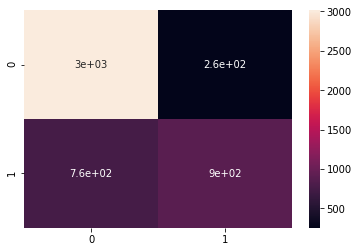

In [397]:
sns.heatmap(confusion_matrix(Ytest,y_pred),annot=True)

In [394]:
from sklearn.metrics import classification_report

In [402]:
print(classification_report(Ytest,rf.predict(Xtest)))

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      3268
         1.0       0.62      0.58      0.60      1654

   micro avg       0.74      0.74      0.74      4922
   macro avg       0.71      0.70      0.71      4922
weighted avg       0.74      0.74      0.74      4922



In [343]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier

In [334]:
gb=  GradientBoostingClassifier(random_state=12,n_estimators=80,
                                learning_rate=0.1,subsample=0.9,
                               max_depth=3).fit(Xtrain,Ytrain)

In [335]:
gb.score(Xtest,Ytest)

0.794392523364486

In [200]:
def plot_learning_curve(model,X,y):
    from sklearn.metrics import accuracy_score
    X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val[:m])
        train_errors.append(1-accuracy_score(y_train_predict,y_train[:m]))
        val_errors.append(1-accuracy_score(y_val_predict,y_val[:m]))
    plt.plot(train_errors,'r+',linewidth=2,label='train')
    plt.plot(val_errors,'b-',linewidth=2,label='val')

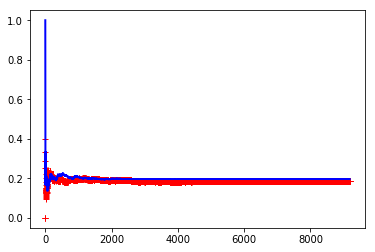

In [201]:
plot_learning_curve(model=gb,X=Xtrain,y=Ytrain)

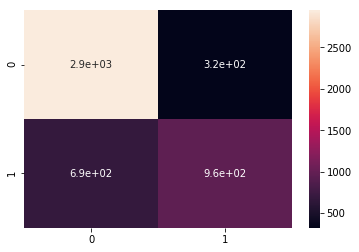

In [65]:
sns.heatmap(confusion_matrix(Ytest,gb.predict(Xtest)),annot=True)

In [66]:
# save the model to disk
filename = 'gb_model.sav'
joblib.dump(gb, filename)

['gb_model.sav']

In [336]:
rf=RandomForestClassifier(random_state=12,n_estimators=100,n_jobs=-1,oob_score=True).fit(Xtrain,Ytrain)

In [337]:
rf.score(Xtest,Ytest)

0.7423811458756603

In [341]:
rf.oob_score_

0.7594495732450792

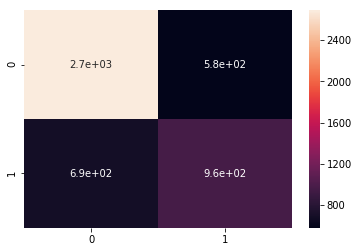

In [344]:
sns.heatmap(confusion_matrix(Ytest,rf.predict(Xtest)),annot=True)

In [70]:
# save the model to disk
filename = 'rf_model.sav'
joblib.dump(rf, filename)

['rf_model.sav']

In [71]:
# load the model from disk
#loaded_model = joblib.load(filename)
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [351]:
et=ExtraTreesClassifier(random_state=12,n_estimators=200,n_jobs=-1).fit(Xtrain,Ytrain)

In [352]:
et.score(Xtest,Ytest)

0.7305973181633483

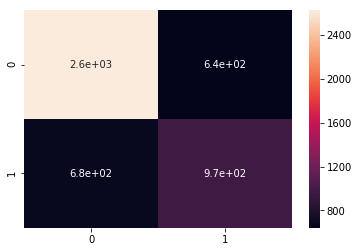

In [353]:
sns.heatmap(confusion_matrix(Ytest,et.predict(Xtest)),annot=True)

In [404]:
from sklearn.ensemble import VotingClassifier

In [435]:
vc=VotingClassifier(estimators=[('cb',cb),('gb',gb),('rf',rf),('lr',lr)], 
                                 voting='soft', weights=[3,2,1,1], n_jobs=-1, flatten_transform=None).fit(Xtrain,Ytrain)

In [437]:
cv_result = cross_validate(vc, Xtrain, Ytrain, cv=5, return_train_score=False)
print('The accuracy is between [{:.4f},{:.4f}].'.format(cv_result['test_score'].mean()-2.76*cv_result['test_score'].std(),
     cv_result['test_score'].mean()+2.76*cv_result['test_score'].std()))

The accuracy is between [0.7735,0.8334].


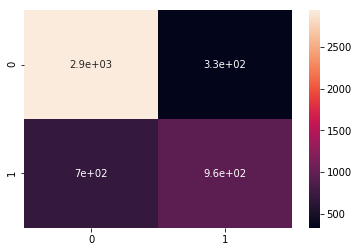

In [436]:
sns.heatmap(confusion_matrix(Ytest,vc.predict(Xtest)),annot=True)

In [ ]:
print(classification_report(Ytest,vc.predict(Xtest)))

In [423]:
print(classification_report(Ytest,cb.predict(Xtest)))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      3268
         1.0       0.76      0.57      0.66      1654

   micro avg       0.80      0.80      0.80      4922
   macro avg       0.79      0.74      0.76      4922
weighted avg       0.79      0.80      0.79      4922



## Test 

In [ ]:
features=[col for col in Xtrain.columns]

In [ ]:
te['age_binned_6']=0
te['age_binned_7']=0

te=te[features]

In [ ]:
np.savetxt('1.csv',cb.predict(te),delimiter=',')